# Facial recognition using MTCNN and ArcFace

## Face detection using MTCNN

### Module import

Let's import all the necessary module.

In [2]:
from facenet_pytorch.models.mtcnn import MTCNN
# from mtcnn import MTCNN
import cv2  # For image input/output
import matplotlib.pyplot as plt # For visualization

ModuleNotFoundError: No module named 'facenet_pytorch'

Get current directory

In [4]:
import os

print(os.getcwd())



/home/torsho/face_detection


Let's see if we can detect face in a sample image.

In [5]:
img = cv2.cvtColor(cv2.imread("samples/1.jpeg"), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)

2021-11-01 15:33:57.886315: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/torsho/face_detection/env/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-01 15:33:57.886339: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-01 15:33:57.886358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (torsho-ThinkPad-L480): /proc/driver/nvidia/version does not exist
2021-11-01 15:33:57.886594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11

Let's visualize the detections.

(-0.5, 1599.5, 899.5, -0.5)

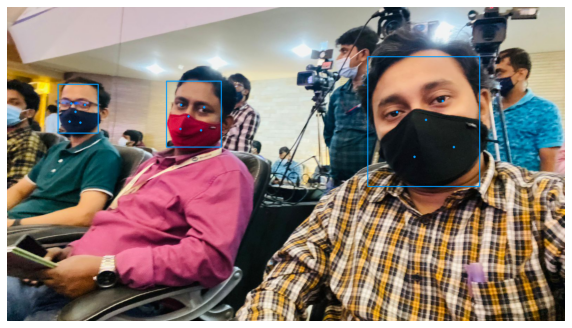

In [6]:

img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x,y), (x+width,y+height), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')
